# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [3]:
cities

['bluff',
 'bagdarin',
 'lazaro cardenas',
 'albany',
 'rassvet',
 'celestun',
 'mahebourg',
 'hamilton',
 'castro',
 'panixtlahuaca',
 'olinda',
 'port elizabeth',
 'aksu',
 'cherskiy',
 'quzhou',
 'les cayes',
 'palmas',
 'butaritari',
 'saint-augustin',
 'iquique',
 'yumen',
 'cabo san lucas',
 'linxia',
 'qaanaaq',
 'portland',
 'maromitsa',
 'punta arenas',
 'ushuaia',
 'kolding',
 'mataura',
 'kokopo',
 'oussouye',
 'berlevag',
 'port blair',
 'ndjole',
 'atuona',
 'tonj',
 'katsuura',
 'kutum',
 'barrow',
 'caravelas',
 'filingue',
 'norman wells',
 'tasiilaq',
 'kahului',
 'pisco',
 'saint anthony',
 'east london',
 'santa isabel',
 'hilo',
 'rikitea',
 'cabedelo',
 'bambous virieux',
 'hasaki',
 'port alfred',
 'busselton',
 'puerto colombia',
 'hobart',
 'yellowknife',
 'umm lajj',
 'mar del plata',
 'barentsburg',
 'tabas',
 'bredasdorp',
 'saint-jean-de-maurienne',
 'fortuna',
 'kapaa',
 'lompoc',
 'khatima',
 'clyde river',
 'cidreira',
 'lebu',
 'pouebo',
 'toliary',
 'va

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
city_data = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []
city_name = []


for city in cities: 
    query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    city_data = requests.get(query_url)
    response_json = city_data.json()
   
    try: 
        city_name.append(response_json['name'])
        lng.append(response_json['coord']['lon'])
        lat.append(response_json['coord']['lat'])
        temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        print(f"{city} found!")
            
    except:
        pass


bluff found!
bagdarin found!
lazaro cardenas found!
albany found!
rassvet found!
celestun found!
mahebourg found!
hamilton found!
castro found!
olinda found!
port elizabeth found!
aksu found!
cherskiy found!
quzhou found!
les cayes found!
palmas found!
butaritari found!
saint-augustin found!
iquique found!
yumen found!
cabo san lucas found!
linxia found!
qaanaaq found!
portland found!
maromitsa found!
punta arenas found!
ushuaia found!
kolding found!
mataura found!
kokopo found!
oussouye found!
berlevag found!
port blair found!
ndjole found!
atuona found!
tonj found!
katsuura found!
kutum found!
barrow found!
caravelas found!
filingue found!
norman wells found!
tasiilaq found!
kahului found!
pisco found!
saint anthony found!
east london found!
santa isabel found!
hilo found!
rikitea found!
cabedelo found!
bambous virieux found!
hasaki found!
port alfred found!
busselton found!
puerto colombia found!
hobart found!
yellowknife found!
umm lajj found!
mar del plata found!
tabas found!
bred

camacha found!
kalmunai found!
grand-santi found!
pasinler found!
kodinar found!
salalah found!
kattivakkam found!
naze found!
barkhan found!
izazi found!
roald found!
darhan found!
djambala found!
itaituba found!
birao found!
urengoy found!
laizhou found!
panjab found!
tukan found!
obsharovka found!
nicseni found!
pag found!
salym found!
iracoubo found!
ode found!
college found!
arman found!
kuching found!
merrill found!
shreveport found!
ukwa found!
lhokseumawe found!
bathsheba found!
gagra found!
ostersund found!
purwodadi found!
sauda found!
dolores found!
namwala found!
gornyye klyuchi found!
loandjili found!
pangkalanbuun found!
sarakhs found!
lecce found!
oxapampa found!
saint peters found!
crixas found!
izhma found!


# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
df = pd.DataFrame(city_name)
df

,0
0,Bluff
1,Bagdarin
2,Lázaro Cárdenas
3,Albany
4,Rassvet
...,...
549,Provincia di Lecce
550,Oxapampa
551,City of Saint Peters
552,Crixás


In [33]:
df['Longitude'] = lng
df['Latitude'] = lat
df['Temperature'] = temp
df['Humidity'] = humidity
df['Cloudiness'] = cloudiness
df['Wind_Speed'] = wind_speed
df

,0,Longitude,Latitude,Temperature,Humidity,Cloudiness,Wind_Speed
0,Bluff,168.3333,-46.6000,13.33,70,87,1.79
1,Bagdarin,113.6000,54.4333,0.45,30,87,8.05
2,Lázaro Cárdenas,-102.2000,17.9583,22.58,73,0,1.83
3,Albany,-73.9662,42.6001,5.00,80,95,0.94
4,Rassvet,40.7500,46.8333,8.72,73,96,2.24
...,...,...,...,...,...,...,...
549,Provincia di Lecce,18.1667,40.2167,12.22,76,0,1.03
550,Oxapampa,-75.4017,-10.5775,14.63,97,97,0.83
551,City of Saint Peters,-90.6265,38.8003,10.00,87,75,2.57
552,Crixás,-49.9692,-14.5489,20.88,88,14,0.69


In [34]:
df.to_csv("city_weather_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [37]:
high_humd = df.loc[(df["Humidity"] >= 100)]
high_humd

,0,Longitude,Latitude,Temperature,Humidity,Cloudiness,Wind_Speed
47,Santa Isabel,-46.2214,-23.3156,17.00,100,75,1.03
50,Cabedelo,-34.8339,-6.9811,23.00,100,75,1.54
59,Mar del Plata,-57.5575,-38.0023,18.89,100,75,2.57
91,Puerto Ayora,-90.3518,-0.7393,23.89,100,80,1.47
106,Carballo,-8.6910,43.2130,7.22,100,0,2.57
117,Syracuse,15.2792,37.0881,14.44,100,75,1.54
129,Conceição do Araguaia,-49.2647,-8.2578,23.00,100,0,1.03
136,Córdoba,-64.1811,-31.4135,21.11,100,0,3.09
160,Marabá,-49.1178,-5.3686,25.00,100,75,1.54
162,Nemuro,145.5750,43.3236,6.00,100,75,5.66


In [40]:
#  Get the indices of cities that have humidity over 100%.
clean_city_data = df.loc[(df["Humidity"] <= 100)]
clean_city_data

,0,Longitude,Latitude,Temperature,Humidity,Cloudiness,Wind_Speed
0,Bluff,168.3333,-46.6000,13.33,70,87,1.79
1,Bagdarin,113.6000,54.4333,0.45,30,87,8.05
2,Lázaro Cárdenas,-102.2000,17.9583,22.58,73,0,1.83
3,Albany,-73.9662,42.6001,5.00,80,95,0.94
4,Rassvet,40.7500,46.8333,8.72,73,96,2.24
...,...,...,...,...,...,...,...
549,Provincia di Lecce,18.1667,40.2167,12.22,76,0,1.03
550,Oxapampa,-75.4017,-10.5775,14.63,97,97,0.83
551,City of Saint Peters,-90.6265,38.8003,10.00,87,75,2.57
552,Crixás,-49.9692,-14.5489,20.88,88,14,0.69


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

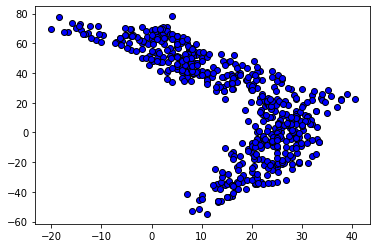

In [41]:
plt.scatter(temp, lat, marker="o", facecolors="blue", edgecolors="black")

## Latitude vs. Humidity Plot

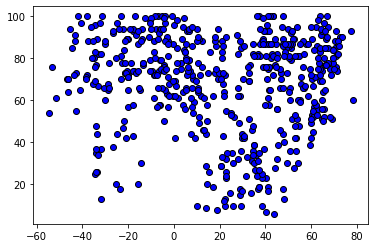

In [42]:
plt.scatter(lat, humidity, marker="o", facecolors="blue", edgecolors="black")

## Latitude vs. Cloudiness Plot

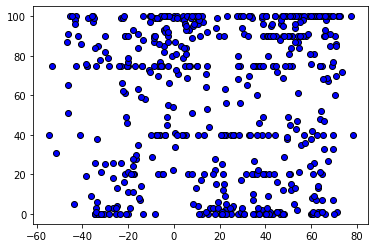

In [43]:
plt.scatter(lat, cloudiness, marker="o", facecolors="blue", edgecolors="black")

## Latitude vs. Wind Speed Plot

In [ ]:
plt.scatter(temp, lat, marker="o", facecolors="blue", edgecolors="black")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression